In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import cv2
import os
import joblib

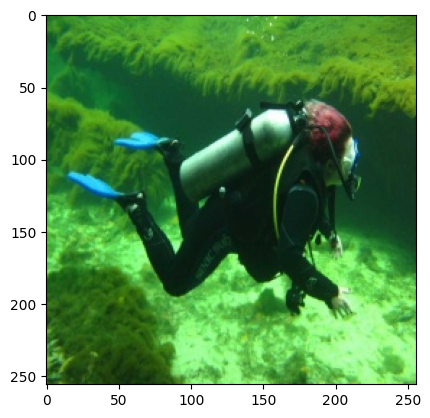

In [ ]:
img=image.load_img("D:/Desktop/fish/data/train/animal fish/0DSM1NY3WE0O.jpg")# load the image
plt.imshow(img)

In [ ]:
array=img_to_array(img)
array.shape  # to check image are numerical form

(256, 256, 3)

In [ ]:
cv2.imread("D:/Desktop/fish/data/train/animal fish/0DSM1NY3WE0O.jpg")# read the image

array([[[ 36, 129,  48],
        [ 33, 128,  47],
        [ 28, 130,  49],
        ...,
        [ 30, 129,  67],
        [ 30, 129,  67],
        [ 32, 131,  69]],

       [[ 38, 125,  45],
        [ 31, 120,  40],
        [ 26, 118,  39],
        ...,
        [ 21, 120,  58],
        [ 27, 126,  64],
        [ 29, 128,  66]],

       [[ 37, 114,  33],
        [ 36, 112,  34],
        [ 34, 112,  35],
        ...,
        [ 23, 124,  62],
        [ 21, 122,  60],
        [ 30, 131,  69]],

       ...,

       [[ 33, 101,  60],
        [  5,  65,  24],
        [ 21,  64,  21],
        ...,
        [111, 219, 123],
        [ 97, 204, 111],
        [ 99, 209, 115]],

       [[ 16,  98,  55],
        [  5,  79,  37],
        [  8,  68,  28],
        ...,
        [ 81, 182,  97],
        [ 78, 180,  98],
        [ 83, 187, 104]],

       [[ 16, 107,  62],
        [ 15,  97,  54],
        [ 18,  85,  46],
        ...,
        [ 81, 178,  98],
        [ 73, 171,  95],
        [ 74, 174,  98]]

In [ ]:
# DATA AUGMENTATION
train = ImageDataGenerator( rescale=1./255,         # Normalize pixel values to [0,1]
                            rotation_range=20,      # Randomly rotate images by ±20 degrees
                            width_shift_range=0.2,  # Shift images horizontally by ±20% of width
                            height_shift_range=0.2, # Shift images vertically by ±20% of height
                            shear_range=0.2,        # Apply shearing transformations
                            zoom_range=0.2,         # Randomly zoom images by ±20%
                            horizontal_flip=True,   # Flip images horizontally
                            fill_mode='nearest'     # Fill pixels after transformation using 'nearest' mode
                            )
validation=ImageDataGenerator(rescale=1/255,
                              rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

In [ ]:
# load data form directory
train_dataset=train.flow_from_directory('D:/Desktop/fish/data/train',# Path to training data
                                        target_size=(300,300),       # Resize images to 300x300
                                        batch_size=32,               # Number of images per batch
                                        class_mode='categorical'     # Multi-class classification
                                        )
validation_dataset=validation.flow_from_directory('D:/Desktop/fish/data/val',# Path to validation data
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical'
                                        )

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


In [ ]:
a=train_dataset.class_indices


In [ ]:
# changing the value of index and key of dictionary
 
image=a
swap={}
for key,value in image.items():
    swap[value]=key
print(swap)

{0: 'animal fish', 1: 'animal fish bass', 2: 'fish sea_food black_sea_sprat', 3: 'fish sea_food gilt_head_bream', 4: 'fish sea_food hourse_mackerel', 5: 'fish sea_food red_mullet', 6: 'fish sea_food red_sea_bream', 7: 'fish sea_food sea_bass', 8: 'fish sea_food shrimp', 9: 'fish sea_food striped_red_mullet', 10: 'fish sea_food trout'}


In [ ]:
joblib.dump(swap,"swaped.keras")# save the swaped the index

['swaped.keras']

In [ ]:
label=joblib.load("D:/Desktop/fish/data/swaped.keras")# load the swaped.keras

In [ ]:
# structure of the model
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(3072,activation='relu'),
                                  tf.keras.layers.Dense(2048,activation='relu'),
                                  tf.keras.layers.Dense(1024,activation='relu'),
    
                                  tf.keras.layers.Dense(len(train_dataset.class_indices),activation='softmax')
                                  ])

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# complie the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
import math

# Check total samples
total_train_samples = len(train_dataset.filenames)
total_val_samples = len(validation_dataset.filenames)

# Calculate steps_per_epoch and validation_steps
batch_size=64
steps_per_epoch = math.ceil(total_train_samples / batch_size)
validation_steps = math.ceil(total_val_samples / batch_size)


In [ ]:
total_train_samples

6225

In [ ]:
steps_per_epoch

13

In [ ]:
# train the model
model_fit = model.fit(
    train_dataset, # train dataset
    steps_per_epoch=steps_per_epoch,# processing the size of per step of epoch
    epochs=40, # total steps of epochs 
    validation_data=validation_dataset,# validation dataset
    validation_steps=validation_steps # validation steps
)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step - accuracy: 0.8508 - loss: 0.3849 - val_accuracy: 0.9375 - val_loss: 0.1781
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.8983 - loss: 0.2956 - val_accuracy: 0.8854 - val_loss: 0.4668
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.8861 - loss: 0.3285 - val_accuracy: 0.8542 - val_loss: 0.3539
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8834 - loss: 0.3266 - val_accuracy: 0.8958 - val_loss: 0.3393
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9091 - loss: 0.2476 - val_accuracy: 0.9583 - val_loss: 0.1208
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9270 - loss: 0.2268 - val_accuracy: 0.9375 - val_loss: 0.2113
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9026 - loss: 0.2695 - val_accuracy: 0.9167 - val_loss: 0.3041
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8984 - loss: 0.2222 - val_accuracy: 0.8958 - val_loss:

In [ ]:
import joblib

joblib.dump(model_fit.history,"training_history.sav")# save the history of model 

['training_history.sav']

In [ ]:
joblib .load("training_history.sav")#load history of model 

{'accuracy': [0.8653846383094788,
  0.8990384340286255,
  0.8942307829856873,
  0.8822115659713745,
  0.895261824131012,
  0.9182692170143127,
  0.90625,
  0.9158653616905212,
  0.9206730723381042,
  0.9399038553237915,
  0.9278846383094788,
  0.9254807829856873,
  0.8509615659713745,
  0.9375,
  0.9230769276618958,
  0.0,
  0.9230769276618958,
  0.90625,
  0.9276807904243469,
  0.9206730723381042,
  0.9158653616905212,
  0.9134615659713745,
  0.9254807829856873,
  0.8894230723381042,
  0.9254807829856873,
  0.9086538553237915,
  0.9038461446762085,
  0.9471153616905212,
  0.9399038553237915,
  0.9591346383094788,
  0.932692289352417,
  0.0,
  0.9495192170143127,
  0.9158653616905212,
  0.9375,
  0.9350961446762085,
  0.9399038553237915,
  0.9254807829856873,
  0.9278846383094788,
  0.9399038553237915],
 'loss': [0.3289859890937805,
  0.2917705774307251,
  0.3159727454185486,
  0.32841870188713074,
  0.26699772477149963,
  0.24981889128684998,
  0.2517464756965637,
  0.1953144371509552

In [ ]:
model_save=model.save("saved_model.keras")# save the model 

In [ ]:
# model load

loaded_model = load_model("saved_model.keras")

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# AUGMENTATION OF TEST DATA
test_datagen = ImageDataGenerator(rescale=1./255,
                            rotation_range=20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest'
                            )


In [ ]:
# load test data from directory file
test_dataset=test_datagen.flow_from_directory('D:/Desktop/fish/data/test',
                                            target_size=(300, 300),   # Adjust to match the input size of your model
                                            batch_size=32,            # Same batch size as train and validation
                                            class_mode='categorical', # As you're performing classification
                                            )

Found 3187 images belonging to 11 classes.


In [ ]:
# MODEL EVALUATION WITH TEST DATA
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

c:\Users\Welcome\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 522s 5s/step - accuracy: 0.9324 - loss: 0.1983
Test Accuracy: 0.9049262404441833
Test Loss: 0.24853728711605072


In [ ]:
predictions = model.predict(test_dataset) # predict the data
predictions

100/100 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step


array([[9.9804628e-01, 1.9536519e-03, 1.2144617e-19, ..., 1.7970908e-20,
        5.9891738e-21, 4.1717996e-12],
       [9.9999189e-01, 8.0944774e-06, 1.0412421e-19, ..., 8.0555171e-14,
        1.4279311e-13, 8.6185957e-16],
       [9.9808806e-01, 1.9119387e-03, 3.1739375e-12, ..., 9.1565444e-12,
        1.7890802e-13, 3.0048380e-10],
       ...,
       [3.2475637e-05, 2.1149649e-04, 2.7137722e-07, ..., 6.5050759e-10,
        2.7618364e-07, 9.8972553e-01],
       [1.0206199e-05, 2.4236928e-04, 3.5634991e-09, ..., 1.7582628e-12,
        5.4361751e-09, 7.7710575e-01],
       [4.6021300e-06, 2.1413753e-04, 1.8685262e-10, ..., 4.8637655e-14,
        7.7684033e-11, 8.1181234e-01]], dtype=float32)

In [ ]:
test_data = np.argmax(predictions, axis=1)#selects the class index with the highest probability for each sample.
test_labels=test_dataset.labels #the predicted class labels.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_data,test_labels)) # classificaton reports

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       516
           1       0.15      0.33      0.21         6
           2       0.96      0.97      0.97       295
           3       0.94      0.69      0.80       418
           4       0.99      0.94      0.97       301
           5       0.90      1.00      0.95       263
           6       0.79      0.97      0.88       223
           7       0.87      0.93      0.90       304
           8       0.96      0.99      0.97       279
           9       0.97      0.88      0.92       323
          10       0.87      0.98      0.92       259

    accuracy                           0.92      3187
   macro avg       0.85      0.88      0.86      3187
weighted avg       0.93      0.92      0.92      3187

